In [116]:
import requests
from bs4 import BeautifulSoup

✍ В предыдущих разделах мы собирали полезную информацию с различных сайтов.

Вы могли убедиться, что поиск необходимой информации с выделением правильных тегов — довольно трудоёмкая задача. Кроме того, подобные программы могут ломаться в случаях, когда меняется дизайн сайта, его разметка или владельцы сайтов защищаются от ботов капчей.

К счастью, многие крупные сайты предоставляют доступ к так называемым API (англ. Application Programming Interface, рус. Интерфейс Прикладного Программирования).

### API — это специальные разделы сайта, где информацию можно получать без разметки, а формат запросов и ответов зафиксирован. API созданы для того, чтобы облегчить взаимодействие с сайтом для сторонних разработчиков.

К примеру, мы уже видели, как ресурс [Курсы валют ЦБ РФ в XML и JSON](https://www.cbr-xml-daily.ru/) возвращает данные о валютах в JSON-формате. Это пример API.

Рассмотрим на примере социальной сети ВКонтакте особенности API, характерные для более крупных сайтов.

# Ключ авторизации

Для того чтобы начать работать с API, обычно необходимо получить сервисный ключ авторизации — токен.

### Токен — это средство идентификации пользователя или отдельного сеанса работы в компьютерных сетях и приложениях. Различают программные и аппаратные токены. Мы будем использовать программный токен, который обычно представляет собой зашифрованную последовательность символов, позволяющую точно идентифицировать объект и определить уровень его привилегий. Он генерируется системой авторизации и привязывается к конкретному сеансу работы, клиенту сети или пакету данных.

Авторизация применяется практически во всех API, чтобы отдавать данные только их владельцу или контролировать количество запросов в единицу времени.

Сервисный токен для API ВКонтакте для нашей задачи создаётся вместе с новым приложением. Приложение мы делать, конечно, не будем. Оно нужно только для получения токена, чтобы сделать необходимые выгрузки.

Зайдите на [страницу](https://dev.vk.com/ru/admin/create-app), чтобы создать приложение (вы должны быть авторизованы ВКонтакте). Дайте приложению любое название, тип и категорию можно не менять:

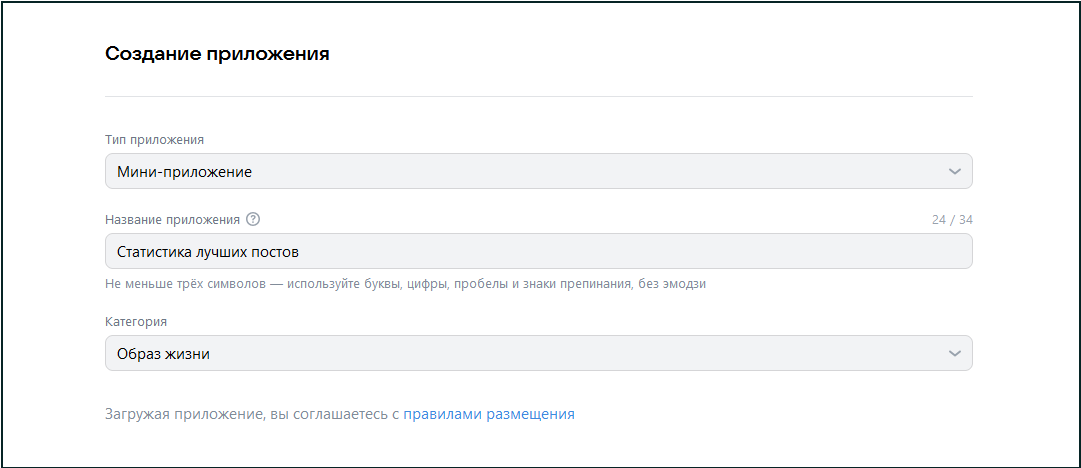

Подтвердив создание приложения на сайте в приложении ВКонтакте или по СМС, выберите на панели слева раздел Разработка и откройте Ключи доступа. Нужный нам токен лежит в поле Сервисный ключ:

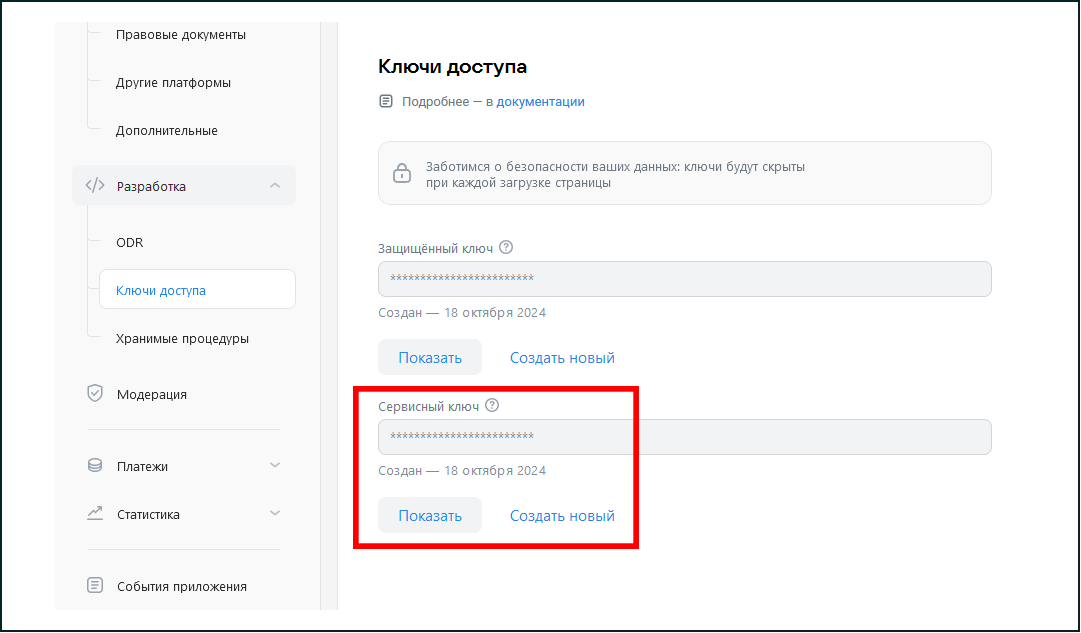

# Первые запросы к API

Чтобы познакомиться с работой API, мы будем получать данные для статистических отчётов произвольной группы, например данные о соотношении мужчин и женщин, статистику географии пользователей и т. п.

Сначала рассмотрим работу API на простом примере, на основе которого работают многие системы.

Сделаем наш первый запрос из браузера.

Перейдите по следующей ниже ссылке в браузере, подставив вместо слова TOKEN ваш персональный сервисный ключ доступа (токен), полученный на предыдущем шаге:

https://api.vk.com/method/users.get?user_id=1&v=5.95&access_token=https://api.vk.com/method/users.get?user_id=1&v=5.95&access_token=7ea04d227ea04d227ea04d22e17d81754f77ea07ea04d2219b2029e652ae4fa260e1a34

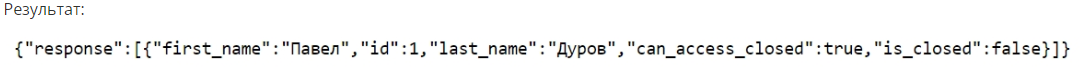

Итак, мы сделали GET-запрос к API ВКонтакте, который состоит из следующих элементов:

- https://api.vk.com/method — домен и URL запроса API; обычно не меняется;

- users.get — название метода, который отдаёт определённый отчёт, в нашем случае это метод для получения информации о пользователе;

- user_id и v — параметры запроса: идентификатор пользователя, о котором хотим получить информацию (в нашем примере мы запрашиваем информацию о первом пользователе), и номер версии API;

- token — токен, который выдаётся только пользователям, имеющим право просматривать определённые данные, например показания счётчиков Яндекс.Метрики вашего проекта; на все остальные запросы без корректного токена система отвечает отказом.

Если мы обратимся к [документации метода users.get](https://vk.com/dev/users.get), то увидим, что в ней описано множество других параметров, которые можно получить о пользователе (дата рождения, пол, родной город и другие) — словом, всё то, что мы видим на странице пользователя в интерфейсе или приложении ВКонтакте (конечно, если пользователь их указал).

Добавим к запросу дату рождения и пол (согласно документации, эти параметры надо перечислять в поле fields):

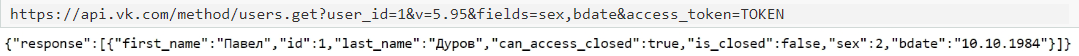

### Примечание: значение 2 у параметра sex означает мужской пол.

До этого момента мы делали запросы в браузере — теперь давайте выполним запросы из кода.

# Запрос к API из кода

Продолжаем пользоваться всё той же библиотекой requests.

In [117]:
token = '7ea04d227ea04d227ea04d22e17d81754f77ea07ea04d2219b2029e652ae4fa260e1a34' # Указываем свой сервисный токен
url = 'https://api.vk.com/method/users.get' # Указываем адрес страницы к которой делаем запрос
params = {'user_id': 1, 'v': 5.95, 'fields': 'sex,bdate', 'access_token': token, 'lang': 'ru'} # Перечисляем параметры нашего запроса в словаре params
response = requests.get(url, params=params) # Отправляем запрос
print(response.text) # Выводим текст ответа на экран

{"response":[{"id":1,"bdate":"10.10.1984","sex":2,"first_name":"Павел","last_name":"Дуров","can_access_closed":true,"is_closed":false}]}


Мы получили строку в JSON-формате, которую можно преобразовать в словарь с помощью метода json(), после чего можно с лёгкостью обращаться к различным полям.

Словари нагляднее выводить с помощью функции pprint(), которую мы уже использовали ранее:

In [118]:
from pprint import pprint # Импортируем функцию pprint()
pprint(response.json()) # Выводим содержимое словаря, содержащего ответ, на экран

{'response': [{'bdate': '10.10.1984',
               'can_access_closed': True,
               'first_name': 'Павел',
               'id': 1,
               'is_closed': False,
               'last_name': 'Дуров',
               'sex': 2}]}


Как вы видите, по ключу response мы можем получить список, в котором хранятся словари, содержащие информацию о запрошенных нами пользователях. Мы запросили информацию лишь об одном из них, поэтому список содержит только один элемент. Извлечём его:

In [119]:
user = response.json()['response'][0] # Извлекаем из словаря по ключу response информацию о первом пользователе
print(user['bdate']) # Выводим дату рождения первого пользователя на экран

10.10.1984


### Задание 6.1

Мы вывели на экран дату рождения пользователя. Напишите строку кода, которая выведет на экран имя пользователя:

In [120]:
print(user['first_name']) # Выводим дату рождения первого пользователя на экран

Павел


Метод users.get() позволяет запрашивать информацию о множестве (до 1 000) пользователей одновременно. Для этого нужно использовать параметр user_ids и передавать id через запятую в строковом формате. Например, чтобы получить информацию о пользователях с id=1, id=2, id=3, необходимо передать значение параметра user_ids='1,2,3'.

Попробуем это сделать:

In [121]:
ids = ",".join(map(str, range(1, 4))) # Формируем строку, содержащую информацию о поле id первых трёх пользователей
ids1 = 1
print(ids)
params = {'user_ids': ids1, 'v': 5.95, 'fields': 1, 'access_token': token, 'lang': 'ru'} # Формируем строку параметров
pprint(requests.get(url, params=params).json()) # Посылаем запрос, полученный ответ в формате JSON-строки преобразуем в словарь и выводим на экран его содержимое, используя функцию pprint()

1,2,3
{'response': [{'can_access_closed': True,
               'first_name': 'Павел',
               'id': 1,
               'is_closed': False,
               'last_name': 'Дуров'}]}


### Задание 6.2

Используя API, определите долю женщин (sex=1) среди пользователей с id от 1 до 500. Иногда будут попадаться пользователи, у которых пол не указан (sex=0), — таких пользователей не нужно учитывать в общем числе.

В ответе укажите число, округлив до двух знаков после точки-разделителя, например, 0.55.

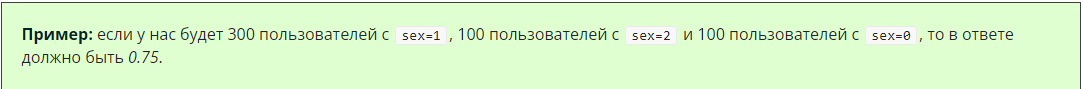

In [122]:
men = 0
women = 0
ids = ','.join(map(str, range(1,501)))
params = {'user_id': ids, 'v': 5.95, 'fields': 'sex', 'access_token': token, 'lang': 'ru'}
response = requests.get(url, params=params).json()['response']

for position in response:
    if 'sex' in position:
        if position['sex'] == 1:
            women += 1
        if position['sex'] == 2:
            men += 1
        else:
            continue
    else:
        continue

print(f'Доля женщин: {round((women/(men+women)),2)}')
print(women)

Доля женщин: 0.49
205


# Сбор информации из групп

В одном из предыдущих юнитов в качестве примера мы собрали информацию о небольшом количестве пользователей. Теперь перейдём к более реальной задаче — сбору данных о пользователях группы ВКонтакте.

Стоит отметить, что есть много сервисов, которые выгружают похожую статистику из соцсетей. Однако им свойственны недостатки универсальных решений:

- не учитываются все особенности вашего проекта;

- используется фиксированный набор метрик, дополнительную обработку данных приходится делать вам;

- не всегда бесплатны и вряд ли позволят работать с большими объёмами данных.

Теперь мы научимся считать произвольные метрики групп, собирая данные из API и работая с двумя ограничениями, которые свойственны практически всем системам:

- ограничение на количество вызовов в единицу времени;

- ограничение на количество выгружаемых строк за один запрос.

Ограничение на количество запросов в единицу времени сделано для того, чтобы избежать чрезмерной нагрузки на серверы системы. В ряде случаев небольшое количество отчётов можно выгрузить и уложиться в действующий лимит.

Однако второе ограничение не удастся обойти в случае выгрузки больших отчётов. Например, чтобы получить список всех пользователей популярной группы, серверу, возможно, придётся отправить ответ, содержащий миллионы записей.

Давайте рассмотрим, как работать с этими ограничениями на примере выгрузки списка пользователей группы https://vk.com/vk социальной сети ВКонтакте.

Обратимся к [документации](https://dev.vk.com/ru/?ref=old_portal), чтобы узнать, какие методы нам доступны для групп, — для получения списка пользователей группы доступен метод [groups.getMembers](https://dev.vk.com/ru/method/groups.getMembers?ref=old_portal).

Согласно документации, обязательным параметром данного метода является group_id — идентификатор, или короткое имя, группы. В нашем случае это vk: https://vk.com/vk. Протестируем, как работает метод в самом простом случае, — получим id участников группы:

In [127]:

token = '7ea04d227ea04d227ea04d22e17d81754f77ea07ea04d2219b2029e652ae4fa260e1a34' # Указываем свой сервисный токен
url = 'https://api.vk.com/method/groups.getMembers' # Указываем адрес обращения
params = {'group_id': 'vk', 'v': 5.95, 'access_token': token} # Формируем строку параметров
response = requests.get(url, params = params) # Посылаем запрос
data = response.json() # Ответ сохраняем в переменной data в формате словаря
print(data) # Выводим содержимое переменной data на экран (отображён фрагмент)

{'response': {'count': 13681240, 'items': [6, 19, 47, 54, 79, 177, 198, 212, 219, 243, 296, 345, 353, 421, 431, 450, 467, 485, 510, 550, 619, 640, 690, 702, 721, 804, 809, 832, 834, 847, 900, 905, 907, 914, 930, 943, 952, 958, 966, 976, 997, 1000, 1018, 1023, 1032, 1033, 1039, 1059, 1097, 1131, 1139, 1140, 1159, 1174, 1185, 1188, 1273, 1301, 1333, 1334, 1351, 1381, 1386, 1388, 1406, 1411, 1418, 1432, 1494, 1503, 1531, 1550, 1568, 1586, 1590, 1593, 1598, 1610, 1615, 1632, 1634, 1650, 1679, 1690, 1697, 1698, 1699, 1700, 1721, 1740, 1754, 1796, 1814, 1820, 1829, 1834, 1839, 1840, 1843, 1858, 1863, 1869, 1887, 1889, 1917, 1943, 1947, 1955, 1969, 2019, 2028, 2050, 2051, 2052, 2059, 2077, 2103, 2136, 2150, 2195, 2201, 2230, 2236, 2273, 2281, 2296, 2298, 2376, 2389, 2395, 2403, 2412, 2436, 2456, 2466, 2470, 2484, 2513, 2515, 2539, 2571, 2576, 2592, 2601, 2622, 2644, 2654, 2692, 2706, 2745, 2755, 2767, 2787, 2797, 2827, 2858, 2909, 2919, 2922, 2932, 2953, 2962, 2982, 3001, 3006, 3041, 3130, 31

По ключу count мы можем получить общее число участников группы, а список по ключу items хранит их id. Посмотрим на него поближе:

In [124]:
print(len(data['response']['items'])) # Выводим на экран количество элементов словаря

1000


Мы видим, что всего пользователей в группе больше 11 миллионов, а получили мы только первую тысячу пользователей группы. По информации, указанной в документации о параметре count, это максимум, который может отдать API за один раз.

Для получения следующей тысячи пользователей можно воспользоваться параметром offset (с англ. смещение), который передвинет начало отсчёта. Для выгрузки всех пользователей группы будем в цикле выгружать по 1000 пользователей (count будет всегда равен 1000), увеличивая смещение offset на величину count.

Для тренировки напишем цикл выгрузки первых 20 пользователей со значением count=5. Иными словами, мы будем выгружать по пять пользователей за запрос до тех пор, пока не получим информацию о 20 пользователях.

Давайте выведем на экран первые 20 пользователей из нашей первой попытки получить информацию о 1000 пользователей, чтобы мы могли сверить результат выгрузки из 20 пользователей:

In [138]:
users_for_checking = data['response']['items'][:20] # Загружаем в переменную информацию об id первых 20 пользователей в виде списка
print(users_for_checking) # Выводим перечень id первых 20 пользователей

[450, 467, 485, 510, 550]


Теперь используем count и offset, чтобы получить те же id по пять за раз:

In [134]:
import requests # Импортируем модуль requests
token = '7ea04d227ea04d227ea04d22e17d81754f77ea07ea04d2219b2029e652ae4fa260e1a34' # Указываем свой сервисный токен
url = 'https://api.vk.com/method/groups.getMembers' # Указываем адрес обращения
count = 5
offset = 0 
user_ids = [] 
max_count = 20
while offset < max_count: 
    # Будем выгружать по count=5 пользователей, 
    # начиная с того места, где закончили на предыдущей итерации (offset) 
    print('Выгружаю {} пользователей с offset = {}'.format(count, offset))   
    params = {'group_id': 'vk', 'v': 5.95, 'count': count, 'offset': offset, 'access_token': token} 
    response = requests.get(url, params = params) 
    data = response.json() 
    user_ids += data['response']['items'] 
    # Увеличиваем смещение на количество строк, которое мы уже выгрузили 
    offset += count 
print(user_ids) 

Выгружаю 5 пользователей с offset = 0
Выгружаю 5 пользователей с offset = 5
Выгружаю 5 пользователей с offset = 10
Выгружаю 5 пользователей с offset = 15
[6, 19, 47, 54, 79, 177, 198, 212, 219, 243, 296, 345, 353, 421, 431, 450, 467, 485, 510, 550]


In [135]:
# Сравним списки, полученные двумя способами:

print(user_ids == users_for_checking) 

True


### Так как результат сравнения — True, списки идентичны. Значит, второй способ работает корректно. Теперь мы можем получить данные обо всех пользователях, выставив count = 1000 и max_count = data['response']['count'].

# Ограничение по частоте запросов

→ В API часто добавляют ограничение по частоте запросов, чтобы отдельно взятые пользователи слишком сильно не перегружали сервер. Подобное ограничение есть и у ВКонтакте — в документации указано, что можно делать не более трёх запросов в секунду.

Чтобы не следить за частотой отправки запросов с секундомером в руках, мы можем после каждого запроса делать паузу. В этом случае, даже если код будет выполняться на самом быстром компьютере, мы не нарушим установленное ограничение, так как периодичность отправки запросов будет искусственно замедлена.

Воспользуемся библиотекой time и методом sleep, с помощью которого мы можем добавить паузу, например в 0.5 секунд, после каждого запроса:

In [142]:
import requests # Импортируем модуль requests
import time # Импортируем модуль time
token = '7ea04d227ea04d227ea04d22e17d81754f77ea07ea04d2219b2029e652ae4fa260e1a34' # Указываем свой сервисный токен
url = 'https://api.vk.com/method/groups.getMembers' # Указываем адрес страницы, к которой делаем запрос
count = 1000 
offset = 0  
user_ids = []  
while offset < 5000: 
    params = {'group_id': 'vk', 'v': 5.95, 'count': count, 'offset': offset, 'access_token': token} 
    response = requests.get(url, params = params) 
    data = response.json() 
    user_ids += data['response']['items'] 
    offset += count 
    print('Ожидаю 0.5 секунды...') 
    time.sleep(0.5) 
print('Цикл завершен, offset =',offset) 

Ожидаю 0.5 секунды...
Ожидаю 0.5 секунды...
Ожидаю 0.5 секунды...
Ожидаю 0.5 секунды...
Ожидаю 0.5 секунды...
Цикл завершен, offset = 5000


# Лайки, репосты и комментарии

Через API новостной ленты ВКонтакте мы можем получить информацию о взаимодействии с сообщениями в ленте.

Для примера продолжим работать с группой https://vk.com/vk и рассмотрим последние 100 сообщений в новостной ленте.

### Примечание: обратите внимание, что т.к. сообщения в новостной ленте непрерывно обновляются, то ваш результат выполнения кода ниже будет отличаться от нашего варианта.

Для получения информации о сообщениях на стене в API ВКонтакте предусмотрен метод wall.get. Применим его:

In [143]:
import requests # Импортируем модуль requests
from pprint import pprint # Импортируем функцию pprint()
token = '7ea04d227ea04d227ea04d22e17d81754f77ea07ea04d2219b2029e652ae4fa260e1a34' # Указываем свой сервисный токен
url = 'https://api.vk.com/method/wall.get' # Указываем адрес страницы, к которой делаем запрос
params = {'domain': 'vk', 'filter': 'owner', 'count': 1000, 'offset': 0, 'access_token': token, 'v': 5.95} 
response = requests.get(url, params = params) 
pprint(response.json()) 

{'response': {'count': 771,
              'items': [{'attachments': [{'type': 'video',
                                          'video': {'can_add': 0,
                                                    'can_dislike': 1,
                                                    'can_like': 1,
                                                    'can_repost': 1,
                                                    'can_subscribe': 1,
                                                    'comments': 504,
                                                    'date': 1728572600,
                                                    'description': 'Продолжаем '
                                                                   'принимать '
                                                                   'поздравления '
                                                                   'по случаю '
                                                                   'нашего '
                           

Посмотрим на количество результатов:

In [144]:
len(response.json()['response']['items'])
## 100

100

Посмотрим на информацию об отдельном сообщении:

In [145]:
response.json()['response']['items'][0] 

{'inner_type': 'wall_wallpost',
 'comments': {'count': 506},
 'marked_as_ads': 0,
 'hash': 'F7JtGPN31o39gzLTdQ',
 'type': 'post',
 'attachments': [{'type': 'video',
   'video': {'response_type': 'full',
    'can_like': 1,
    'can_repost': 1,
    'can_subscribe': 1,
    'can_add': 0,
    'comments': 504,
    'date': 1728572600,
    'description': 'Продолжаем принимать поздравления по случаю нашего совершеннолетия 🎉\n\nСпасибо всем за тёплые слова!',
    'duration': 64,
    'photo_130': 'https://i.mycdn.me/getVideoPreview?id=7029659536035&idx=15&type=39&tkn=iiZb83d9okPCOr6v-16bpEosOhI&fn=vid_s',
    'photo_320': 'https://i.mycdn.me/getVideoPreview?id=7029659536035&idx=15&type=39&tkn=iiZb83d9okPCOr6v-16bpEosOhI&fn=vid_l',
    'photo_800': 'https://i.mycdn.me/getVideoPreview?id=7029659536035&idx=15&type=39&tkn=iiZb83d9okPCOr6v-16bpEosOhI&fn=vid_x',
    'photo_1280': 'https://i.mycdn.me/getVideoPreview?id=7029659536035&idx=15&type=39&tkn=iiZb83d9okPCOr6v-16bpEosOhI&fn=vid_w',
    'first_fr

В полях comments, likes и reposts содержится статистика по взаимодействию с сообщением пользователей (на момент получения информации) — число комментариев, лайков и репостов.

Давайте соберём итоговую статистику для последних десяти непустых сообщений в словарь stats. В качестве ключа будем использовать начало сообщения (если начало сообщения пустое, то информацию о таком сообщении проигнорируем), в качестве значения — список с тремя интересующими нас метриками и временем публикации (комментарии, лайки, репосты, дата публикации):

In [146]:
stats = {} 
count_post = 0 # Счётчик «непустых» сообщений
for record in response.json()['response']['items'][:]:
    title = record['text'][:30] 
    if title: 
        stats[title] = [record['comments']['count'], record['likes']['count'], record['reposts']['count'], record['date']] 
        count_post += 1 
    if count_post < 10: 
        continue 
    else: 
        break 
pprint(stats)

{'VK Музыка обновилась! Что ново': [386, 520, 103, 1728310195],
 'Какие персонажи — такие и их л': [588, 1142, 149, 1726227240],
 'Кто знает, какой сегодня день ': [304, 835, 88, 1725376800],
 'Кто разгадал ребус, тому завтр': [220, 1140, 100, 1725174600],
 'Негласное правило ВКонтакте № ': [353, 889, 153, 1726056001],
 'Новая программа монетизации от': [791, 676, 230, 1727083149],
 'Обновился VK Мессенджер в веб-': [410, 647, 266, 1726748100],
 'Представляем VK AdBlogger — но': [158, 371, 134, 1726654200],
 'Сегодня ВКонтакте исполнилось ': [360, 1285, 200, 1728560919],
 'Что можно успеть за 60 секунд?': [413, 1565, 139, 1726757657]}


Мы рассмотрели базовое взаимодействие с пользователями и группами. ВКонтакте предоставляет достаточно широкие возможности в своём API: всё, что можно делать вручную через браузер, доступно и в API.

### ДОПОЛНИТЕЛЬНО

Если вы размещаете рекламу во ВКонтакте, то можно выгружать всю статистику через [ads API](https://dev.vk.com/ru/reference).

Полный список методов ВКонтакте можно посмотреть в [документации.](https://dev.vk.com/ru/method?ref=old_portal)

# Другие API

Вы познакомились с интерфейсами прикладного программирования — API (на примере API социальной сети ВКонтакте).

API для разработчиков предоставляют и многие другие платформы. Вот список, пожалуй, самых популярных из них:

- [Google Maps API](https://developers.google.com/maps?hl=ru)

- [YouTube API](https://developers.google.com/youtube?hl=ru)

- [Twitter API](https://dev.twitter.com/overview/documentation)

- [Facebook API](https://developers.facebook.com/docs/)

Вы также можете воспользоваться интернет-поиском, указав в поисковой строке, например, «курсы валют API» или «прогноз погоды api», — среди первых результатов выдачи чаще всего с лёгкостью можно найти ссылки на необходимый функционал.

In [1]:
import numpy as np